# kNN и K-Means
Разбор статьи: https://pythonru.com/uroki/sklearn-kmeans-i-knn

**Метод классификации kNN**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('classified_data.csv', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = df.drop('TARGET CLASS', axis=1).columns)

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X = scaled_data
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
kNN_model = KNeighborsClassifier(n_neighbors=1)
kNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
y_pred = kNN_model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       148
           1       0.94      0.92      0.93       152

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [24]:
print(confusion_matrix(y_test, y_pred))

[[139   9]
 [ 12 140]]


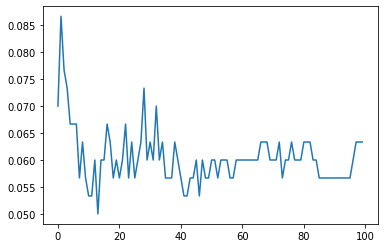

In [26]:
#метод логтя
error_rates = []

for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, y_train)
    new_y_pred = new_model.predict(X_test)
    error_rates.append(np.mean(new_y_pred != y_test))

plt.plot(error_rates)

**Метод кластеризации K-Means**

In [27]:
from sklearn.datasets import make_blobs

In [28]:
data = make_blobs(
    n_samples = 200, 
    n_features = 2, 
    centers = 4, 
    cluster_std = 1.8
)

In [ ]:
print(data)

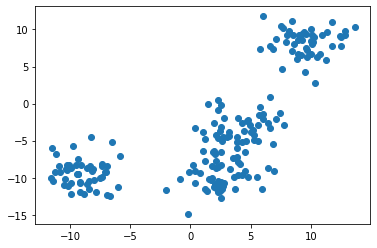

In [31]:
plt.scatter(data[0][:,0], data[0][:,1])

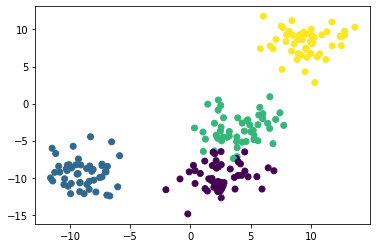

In [34]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1]);

In [38]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
kmeans.labels_

array([0, 1, 1, 0, 2, 2, 2, 3, 2, 1, 3, 0, 0, 1, 0, 2, 2, 0, 2, 0, 3, 3,
       0, 0, 3, 0, 2, 0, 3, 0, 1, 2, 1, 1, 3, 1, 0, 1, 0, 1, 1, 1, 3, 2,
       3, 2, 2, 2, 0, 2, 2, 3, 0, 3, 2, 0, 2, 0, 2, 0, 1, 0, 2, 3, 1, 0,
       0, 3, 3, 1, 3, 3, 2, 0, 0, 0, 3, 2, 2, 1, 3, 0, 3, 0, 3, 3, 1, 2,
       1, 3, 1, 3, 2, 1, 1, 1, 3, 3, 3, 0, 1, 0, 2, 3, 1, 1, 1, 1, 2, 3,
       0, 1, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 1, 1, 3, 1, 0, 3, 1,
       2, 1, 1, 2, 3, 1, 2, 3, 2, 0, 1, 3, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1,
       2, 1, 0, 1, 3, 0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 3, 1, 1, 2, 3, 1, 3,
       0, 2, 1, 3, 0, 0, 3, 1, 0, 0, 0, 0, 1, 3, 2, 3, 2, 2, 0, 3, 2, 3,
       1, 2], dtype=int32)

In [44]:
kmeans.cluster_centers_

array([[ 4.17690118, -3.19073482],
       [ 9.58345277,  8.29247356],
       [-8.96436106, -9.36899079],
       [ 2.48430794, -9.66193018]])

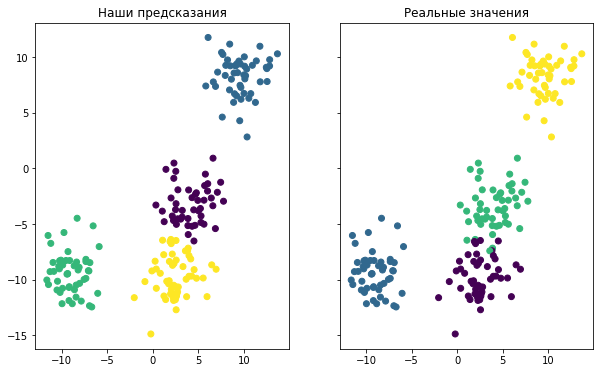

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title('Наши предсказания')
ax1.scatter(data[0][:,0], data[0][:,1],c=kmeans.labels_)
ax2.set_title('Реальные значения')
ax2.scatter(data[0][:,0], data[0][:,1],c=data[1]);